In [5]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

project_root = Path.cwd().parent
data_csv_path = project_root / "data" / "raw" / "job_descriptions.csv"

In [3]:
df = pl.read_csv(str(data_csv_path))

In [26]:
df.head(5)

Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
i64,str,str,str,str,str,f64,f64,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str
1089843540111562,"""5 to 15 Years""","""M.Tech""","""$59K-$99K""","""Douglas""","""Isle of Man""",54.2361,-4.5481,"""Intern""",26801,"""2022-04-24""","""Female""","""Brandon Cunningham""","""001-381-930-7517x737""","""Digital Marketing Specialist""","""Social Media Manager""","""Snagajob""","""Social Media Managers oversee …","""{'Flexible Spending Accounts (…","""Social media platforms (e.g., …","""Manage and grow social media a…","""Icahn Enterprises""","""{""Sector"":""Diversified"",""Indus…"
398454096642776,"""2 to 12 Years""","""BCA""","""$56K-$116K""","""Ashgabat""","""Turkmenistan""",38.9697,59.5563,"""Intern""",100340,"""2022-12-19""","""Female""","""Francisco Larsen""","""461-509-4216""","""Web Developer""","""Frontend Web Developer""","""Idealist""","""Frontend Web Developers design…","""{'Health Insurance, Retirement…","""HTML, CSS, JavaScript Frontend…","""Design and code user interface…","""PNC Financial Services Group""","""{""Sector"":""Financial Services""…"
481640072963533,"""0 to 12 Years""","""PhD""","""$61K-$104K""","""Macao""","""Macao SAR, China""",22.1987,113.5439,"""Temporary""",84525,"""2022-09-14""","""Male""","""Gary Gibson""","""9687619505""","""Operations Manager""","""Quality Control Manager""","""Jobs2Careers""","""Quality Control Managers estab…","""{'Legal Assistance, Bonuses an…","""Quality control processes and …","""Establish and enforce quality …","""United Services Automobile Ass…","""{""Sector"":""Insurance"",""Industr…"
688192671473044,"""4 to 11 Years""","""PhD""","""$65K-$91K""","""Porto-Novo""","""Benin""",9.3077,2.3158,"""Full-Time""",129896,"""2023-02-25""","""Female""","""Joy Lucero""","""+1-820-643-5431x47576""","""Network Engineer""","""Wireless Network Engineer""","""FlexJobs""","""Wireless Network Engineers des…","""{'Transportation Benefits, Pro…","""Wireless network design and ar…","""Design, configure, and optimiz…","""Hess""","""{""Sector"":""Energy"",""Industry"":…"
117057806156508,"""1 to 12 Years""","""MBA""","""$64K-$87K""","""Santiago""","""Chile""",-35.6751,-71.5429,"""Intern""",53944,"""2022-10-11""","""Female""","""Julie Johnson""","""343.975.4702x9340""","""Event Manager""","""Conference Manager""","""Jobs2Careers""","""A Conference Manager coordinat…","""{'Flexible Spending Accounts (…","""Event planning Conference logi…","""Specialize in conference and c…","""Cairn Energy""","""{""Sector"":""Energy"",""Industry"":…"


In [28]:
df.shape

(1615940, 23)

In [29]:
df.null_count()

Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5478


In [4]:
for col in df.columns:
    print(f"{col}: {df[col].n_unique()}")

Job Id: 1615940
Experience: 48
Qualifications: 10
Salary Range: 561
location: 214
Country: 216
latitude: 216
longitude: 216
Work Type: 5
Company Size: 122188
Job Posting Date: 731
Preference: 3
Contact Person: 367128
Contact: 1615933
Job Title: 147
Role: 376
Job Portal: 16
Job Description: 376
Benefits: 11
skills: 376
Responsibilities: 375
Company: 888
Company Profile: 885


In [56]:
df.describe()

statistic,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
str,f64,str,str,str,str,str,f64,f64,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""",1.61594e6,"""1615940""","""1615940""","""1615940""","""1615940""","""1615940""",1.61594e6,1.61594e6,"""1615940""",1.61594e6,"""1615940""","""1615940""","""1615940""","""1615940""","""1615940""","""1615940""","""1615940""","""1615940""","""1615940""","""1615940""","""1615940""","""1615940""","""1610462"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""5478"""
"""mean""",1.5489e15,null,null,null,null,null,19.377431,16.399259,null,73704.671546,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",8.9467e14,null,null,null,null,null,23.556904,70.667622,null,35298.863912,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""",1.8179e11,"""0 to 10 Years""","""B.Com""","""$55K-$100K""","""Abu Dhabi""","""Afghanistan""",-40.9006,-175.1982,"""Contract""",12646.0,"""2021-09-15""","""Both""","""Aaron Abbott""","""(200)203-8257x84492""","""Account Director""","""API Developer""","""CareerBuilder""","""A Backend Developer is tasked …","""{'Casual Dress Code, Social an…","""API design and development RES…","""Accurately enter and maintain …","""3M""","""{""Sector"":""Advertising & Marke…"
"""25%""",7.7405e14,null,null,null,null,null,5.1521,-15.3101,null,43114.0,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",1.5479e15,null,null,null,null,null,18.0708,19.1451,null,73633.0,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",2.3237e15,null,null,null,null,null,39.0742,47.5769,null,104300.0,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""",3.0996e15,"""5 to 9 Years""","""PhD""","""$65K-$99K""","""Zagreb""","""Zimbabwe""",71.7069,178.065,"""Temporary""",134834.0,"""2023-09-15""","""Male""","""Zoe Young""","""9999994790""","""Wedding Planner""","""Wireless Network Engineer""","""ZipRecruiter""","""Work with at-risk children and…","""{'Tuition Reimbursement, Stock…","""Writing skills Content creatio…","""Write web content optimized fo…","""Zoetis""","""{""Sector"":""Wholesale & Retail""…"


In [ ]:
for col in df.columns:
    if df[col].dtype.is_numeric():
        vals = df[col].drop_nulls()
        q1 = vals.quantile(0.25)
        q3 = vals.quantile(0.75)
        
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        outliers = df.filter((pl.col(col) < lower) | (pl.col(col) > upper)).height
        total = df[col].len()
        
        print(f"{col}: {outliers}/{total} ({outliers / total * 100 :.1f}%)")

Job Id: 0/1615940 (0.0%)
latitude: 0/1615940 (0.0%)
longitude: 127102/1615940 (7.9%)
Company Size: 0/1615940 (0.0%)


In [63]:
for col in df.columns:
    if not df[col].dtype.is_numeric():
        counts = df[col].value_counts().sort("count")
        total = df[col].drop_nulls().len()
        
        if counts.height > 0:
            rare_val, rare_cnt = counts[0, col], counts[0, "count"]
            common_val, common_cnt = counts[-1, col], counts[-1, "count"]
            
            print(f"{col}: common: ({common_cnt/total*100:.1f}%), rare: ({rare_cnt/total*100:.1f}%)")

Experience: common: (2.1%), rare: (2.1%)
Qualifications: common: (10.0%), rare: (10.0%)
Salary Range: common: (0.2%), rare: (0.2%)
location: common: (0.9%), rare: (0.5%)
Country: common: (0.5%), rare: (0.5%)
Work Type: common: (20.1%), rare: (19.9%)
Job Posting Date: common: (0.1%), rare: (0.1%)
Preference: common: (33.4%), rare: (33.3%)
Contact Person: common: (0.1%), rare: (0.0%)
Contact: common: (0.0%), rare: (0.0%)
Job Title: common: (3.0%), rare: (0.2%)
Role: common: (1.3%), rare: (0.2%)
Job Portal: common: (8.0%), rare: (4.0%)
Job Description: common: (1.3%), rare: (0.2%)
Benefits: common: (10.0%), rare: (5.0%)
skills: common: (1.3%), rare: (0.2%)
Responsibilities: common: (1.3%), rare: (0.2%)
Company: common: (0.1%), rare: (0.1%)
Company Profile: common: (0.3%), rare: (0.1%)


array([[<Axes: title={'center': 'Company Size'}>]], dtype=object)

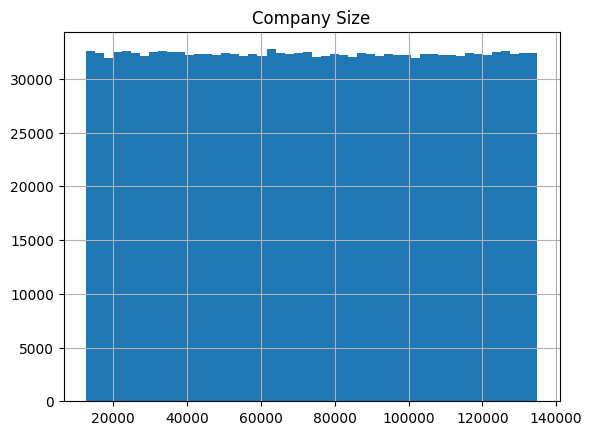

In [4]:
df.select("Company Size").to_pandas().hist(bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x15f2671aea0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f2671b320>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f2671abd0>],
 'medians': [<matplotlib.lines.Line2D at 0x15f2671b8c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f2671bb60>],
 'means': []}

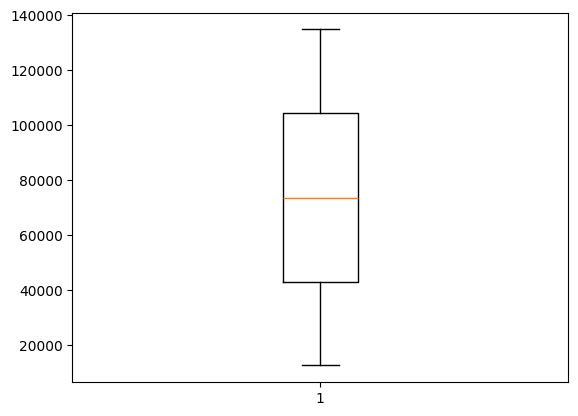

In [7]:
plt.boxplot(df["Company Size"].to_pandas(), vert=True)

In [45]:
df["Country"].value_counts().sort("count", descending=True).head(10)

Country,count
str,u32
"""Malta""",7723
"""Venezuela, RB""",7694
"""Somalia""",7689
"""Sierra Leone""",7656
"""Sri Lanka""",7649
"""Vietnam""",7649
"""Azerbaijan""",7643
"""San Marino""",7638
"""Turkmenistan""",7633


In [46]:
df["Country"].value_counts().sort("count", descending=False).head(10)

Country,count
str,u32
"""Lithuania""",7273
"""Uganda""",7290
"""Iceland""",7292
"""Ukraine""",7307
"""Ghana""",7312
"""Zimbabwe""",7313
"""Cayman Islands""",7319
"""Bahamas, The""",7321
"""Uzbekistan""",7322


<Axes: xlabel='Country'>

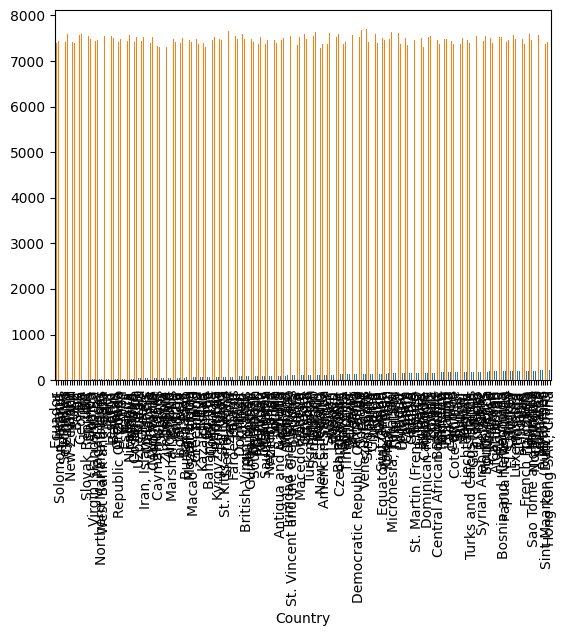

In [29]:
(df["Country"]
 .value_counts()
 .to_pandas()
 .reset_index()
 .set_index("Country")
 .plot(kind="bar", legend=False))

In [44]:
df["Work Type"].value_counts().sort("count", descending=True)

Work Type,count
str,u32
"""Part-Time""",324044
"""Temporary""",323439
"""Contract""",323131
"""Intern""",323090
"""Full-Time""",322236


<Axes: xlabel='Work Type'>

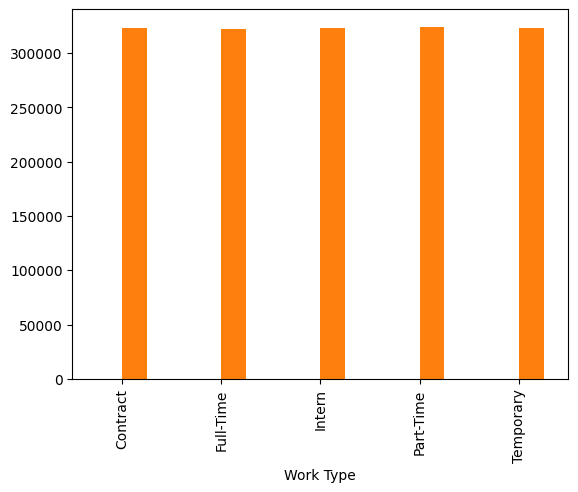

In [30]:
(df["Work Type"]
 .value_counts()
 .to_pandas()
 .reset_index()
 .set_index("Work Type")
 .plot(kind="bar", legend=False))

In [43]:
df["Preference"].value_counts().sort("count", descending=True)

Preference,count
str,u32
"""Male""",539167
"""Both""",538437
"""Female""",538336


<Axes: xlabel='Preference'>

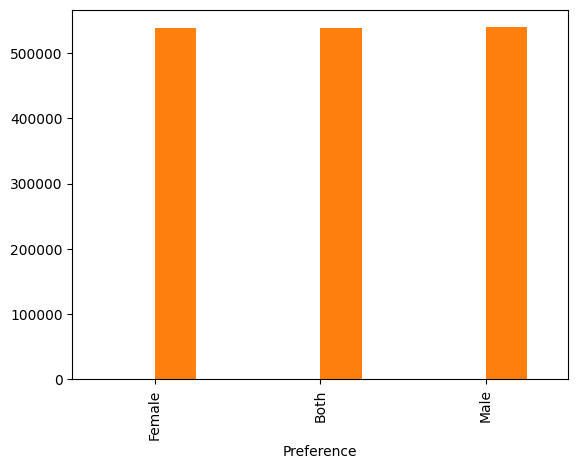

In [31]:
(df["Preference"]
 .value_counts()
 .to_pandas()
 .reset_index()
 .set_index("Preference")
 .plot(kind="bar", legend=False))

In [42]:
df["Qualifications"].value_counts().sort("count", descending=True)

Qualifications,count
str,u32
"""BBA""",162148
"""BA""",162138
"""BCA""",161733
"""M.Tech""",161719
"""PhD""",161662
"""MBA""",161537
"""B.Tech""",161443
"""M.Com""",161396
"""B.Com""",161298


<Axes: xlabel='Qualifications'>

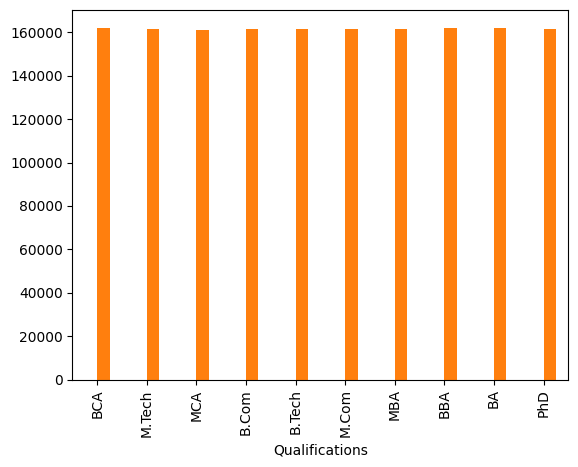

In [ ]:
(df["Qualifications"]
 .value_counts()
 .to_pandas()
 .reset_index()
 .set_index("Qualifications")
 .plot(kind="bar", legend=False))

In [37]:
df["Job Title"].value_counts().sort("count", descending=True).head(10)

Job Title,count
str,u32
"""UX/UI Designer""",48551
"""Digital Marketing Specialist""",27975
"""Software Engineer""",27630
"""Network Engineer""",24393
"""Software Tester""",20945
"""Executive Assistant""",20776
"""Procurement Manager""",20734
"""Financial Advisor""",20687
"""Sales Representative""",17664


<Axes: xlabel='Job Title'>

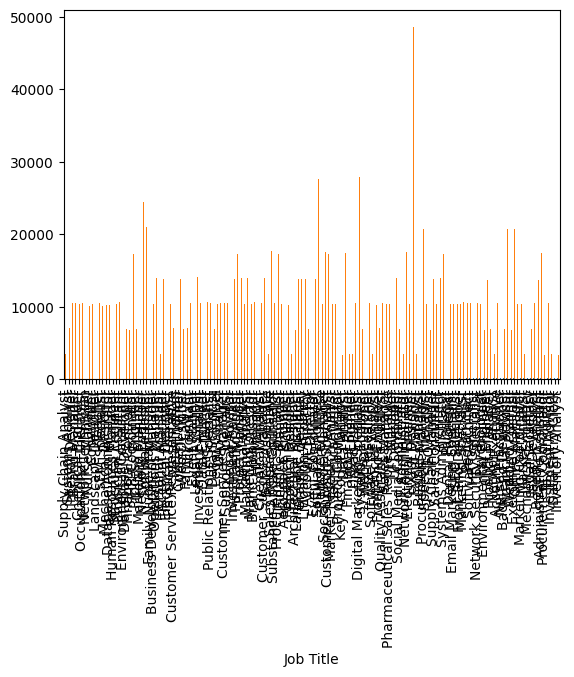

In [32]:
(df["Job Title"]
 .value_counts()
 .to_pandas()
 .reset_index()
 .set_index("Job Title")
 .plot(kind="bar", legend=False))

In [38]:
df["location"].value_counts().sort("count", descending=True).head(10)

location,count
str,u32
"""Seoul""",15104
"""Apia""",15057
"""Valletta""",7723
"""Caracas""",7694
"""Mogadishu""",7689
"""Freetown""",7656
"""Hanoi""",7649
"""Sri Jayawardenepura Kotte""",7649
"""Baku""",7643


In [39]:
df["Salary Range"].value_counts().sort("count", descending=True).head(10)

Salary Range,count
str,u32
"""$59K-$88K""",3043
"""$58K-$101K""",3038
"""$62K-$82K""",3033
"""$61K-$106K""",3025
"""$61K-$112K""",3015
"""$64K-$120K""",3003
"""$62K-$107K""",3003
"""$64K-$83K""",3003
"""$62K-$84K""",3000


In [40]:
df["skills"].value_counts().sort("count", descending=True).head(10)

skills,count
str,u32
"""Interaction design principles …",20580
"""Network management Troubleshoo…",17470
"""UI design principles and best …",14036
"""Social media platforms (e.g., …",13945
"""User-centered design principle…",13935
"""Procurement processes Vendor a…",13757
"""Social media analytics tools (…",10659
"""Quality assurance processes Te…",10541
"""Search engine algorithms and r…",10512


In [41]:
df["Company"].value_counts().sort("count", descending=True).head(10)

Company,count
str,u32
"""DTE Energy""",1957
"""Berry Global Group""",1941
"""Marsh & McLennan""",1941
"""Vistra""",1938
"""International Flavors & Fragra…",1928
"""Bank of New York Mellon""",1927
"""Midea Group""",1922
"""BJ's Wholesale Club""",1918
"""Bharat Electronics Limited""",1918
